# CS146 Session 6.2 PCW #

## Dirichlet Distributions ## 

In [126]:
import pandas as pd 
import scipy.stats as sts
import numpy as np 
import matplotlib.pyplot as plt 

In [127]:
df = pd.read_csv("socialmobility.csv")
df

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


### Posterior 95% Probability interval over the probability that an unskilled dad will have a skilled son ### 

In [143]:
unskilled_dad = df.loc[4:7,['father', 'son','count']]

unskilled_dad

,father,son,count
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568


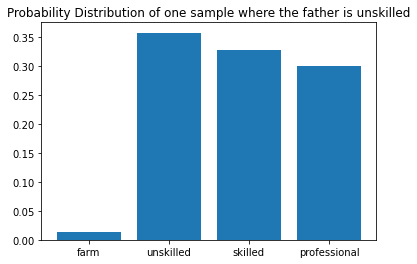

In [167]:
# We add +1 to the count because we use a uniform distribution 

samples = sts.dirichlet.rvs([59, 1757, 1631, 1569], size = 1000)

labels_son = ['farm', 'unskilled', 'skilled', 'professional']

plt.bar(labels_son, samples[1])
plt.title("Probability Distribution of one sample where the father is unskilled")
plt.show()

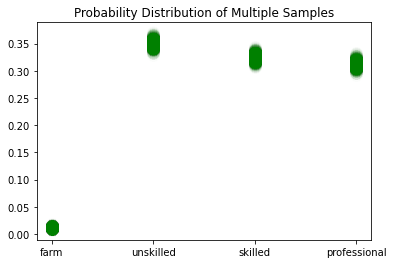

In [168]:
for sample in samples:
    plt.plot(labels_son, sample, 'go', alpha = 0.01, markersize = 12)
plt.title("Probability Distribution of Multiple Samples")
plt.show()

In [161]:
skilled_son_unskilled_father = []

for sample in samples:
    skilled_son_unskilled_father.append(sample[2])
    
# 95% Probability Interval 
np.percentile(skilled_son_unskilled_father, [0.025, 0.975])

array([0.30548278, 0.31045454])

### Posterior 95% Probability interval over the probability that a professional son will have a farm dad ### 

In [170]:
professional_son = df.loc[df['son'] == 'professional', ['father', 'son', 'count']]

professional_son

,father,son,count
3,farm,professional,1109
7,unskilled,professional,1568
11,skilled,professional,2483
15,professional,professional,3315


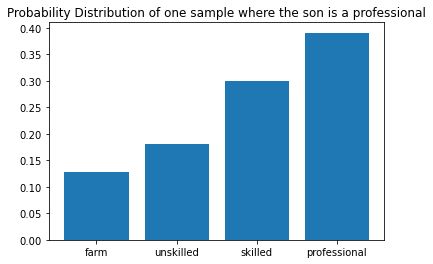

In [171]:
# We add +1 to the count because we use a uniform distribution 

samples = sts.dirichlet.rvs([1110, 1567, 2484, 3316], size = 1000)

labels_father = ['farm', 'unskilled', 'skilled', 'professional']

plt.bar(labels_father, samples[1])
plt.title("Probability Distribution of one sample where the son is a professional")
plt.show()

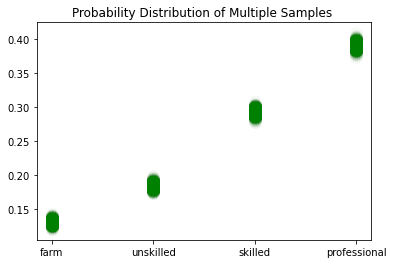

In [172]:
for sample in samples:
    plt.plot(labels_father, sample, 'go', alpha = 0.01, markersize = 12)
plt.title("Probability Distribution of Multiple Samples ")
plt.show()

In [173]:
professional_son_farming_dad = []

for sample in samples:
    professional_son_farming_dad.append(sample[0])
    
# 95% Probability Interval 
np.percentile(professional_son_farming_dad, [0.025, 0.975])

array([0.11952247, 0.1225902 ])